#Linear Autoencoder

# Import relevant Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

# Loading the dataset
https://keras.io/api/datasets/mnist

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# Visualize the images randomly

Label:8


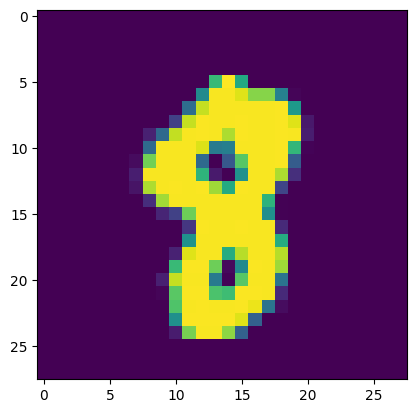

In [8]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i]);

Label:2


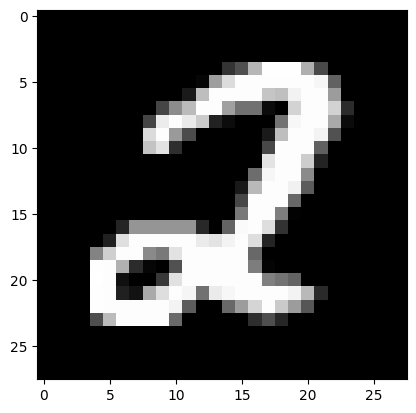

In [9]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i], cmap='gray');

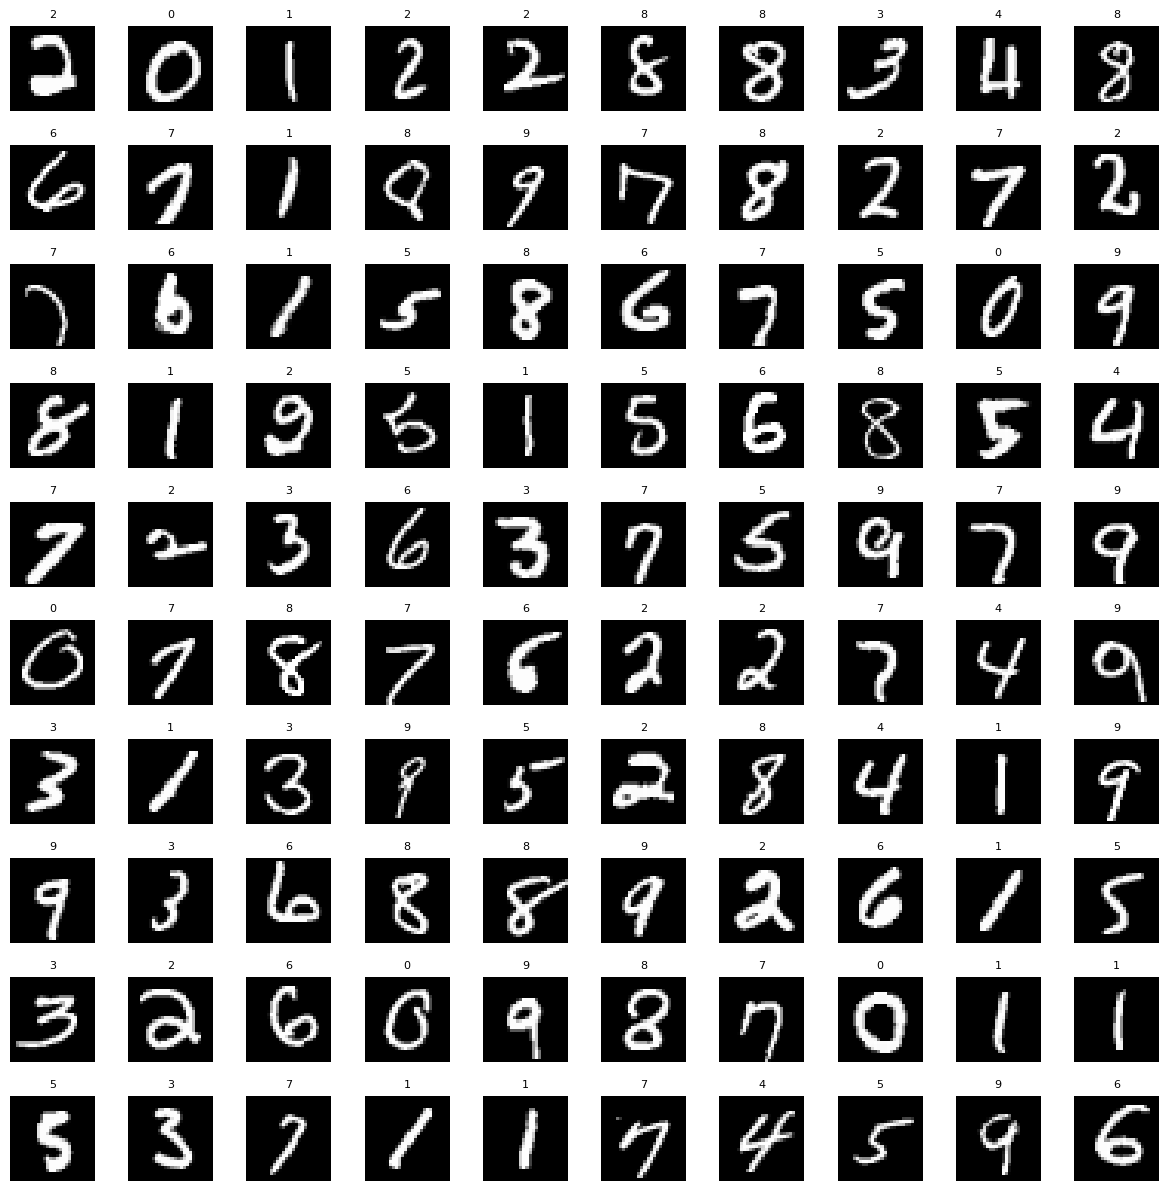

In [10]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15)) # creates a 10x10 axes canvas for displaying the images of axes=10x10 = 100
axes = axes.ravel() # since the axes is a matrix, we convert it to vector to fit in the canvas 1.e. axes = (10,10) -> 100
for i in np.arange(0, width*height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Preprocessing the Images

In [11]:
# vecotrize the images
X_train[0].min(), X_train[0].max()


(0, 255)

In [12]:
X_test[0].min(), X_test[0].max()

(0, 255)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
X_train.shape  # (60000 images, 28 rows, 28 columns)

(60000, 28, 28)

In [17]:
X_test.shape # (10000 images, 28 rows, 28 columns)

(10000, 28, 28)

In [18]:
# Reshaping to flatten all images to a single vector
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [19]:
X_test.shape[0], X_test.shape[1], X_test.shape[2]

(10000, 28, 28)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [21]:
X_train.shape # 60000 images in a 784 row vector

(60000, 784)

In [22]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [23]:
X_test.shape # 10000 images in a 784 row vector

(10000, 784)

# Building and Training the Linear Autoencoder

In [24]:
# linear autoencoder structure
# 784 - 128 - 64 - 32 - 64 - 128 - 784
# input - conv1 - conv2 - coding - decoding - conv3  - output

In [25]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units= 128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [26]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [27]:
# compile the autoencoder
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [28]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1484 - accuracy: 0.0101
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1072 - accuracy: 0.0115
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0990 - accuracy: 0.0125
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0947 - accuracy: 0.0124
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0919 - accuracy: 0.0125
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0898 - accuracy: 0.0137
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0882 - accuracy: 0.0134
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0871 - accuracy: 0.0135
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0862 - accuracy: 0.0132
Epoch 10/20
1875/1875 [==============================] - 12s 6ms/step - l

# Encoding the Images

In [47]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [48]:
autoencoder.get_layer('dense_2').output # the coding output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [49]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output)

In [50]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


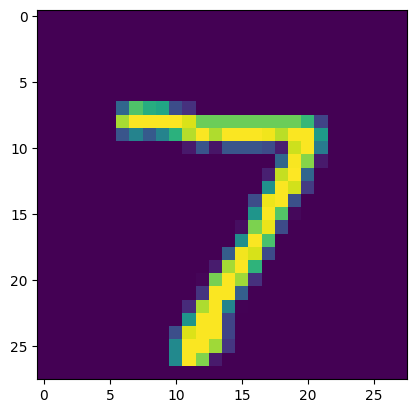

In [51]:
# Test encoder
plt.imshow(X_test[0].reshape(28, 28));

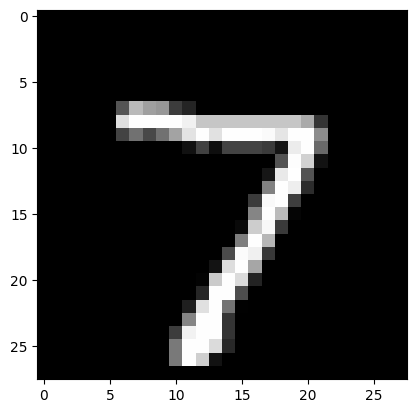

In [52]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray');

In [53]:
X_test[0].shape

(784,)

In [54]:
X_test[0].reshape(1, -1).shape # means add 1 image with 784 flattened pixel

(1, 784)

In [55]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 55ms/step


In [56]:
encoded_image, encoded_image.shape

(array([[ 6.4991083,  4.0726867,  8.568399 ,  3.8491282,  4.7220855,
          0.       ,  4.325549 ,  8.370269 ,  1.5541463, 12.851568 ,
          3.5689914,  5.7976108,  2.3457272,  4.4827185,  5.837223 ,
          9.044721 ,  0.       ,  9.179269 ,  0.       ,  4.8926725,
          4.93737  ,  7.6697335,  7.861951 ,  7.2348175,  7.0937986,
          4.6944313,  8.580785 ,  5.951502 ,  8.598054 ,  0.       ,
          6.777416 ,  4.4113007]], dtype=float32),
 (1, 32))

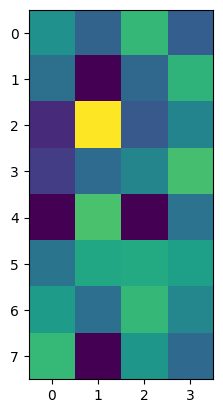

In [57]:
plt.imshow(encoded_image.reshape(8,4));

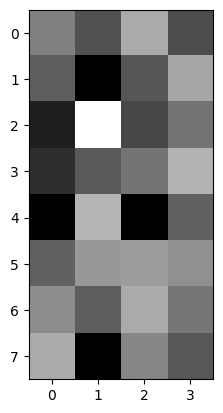

In [58]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

# Decoding the Images

In [59]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [62]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [63]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 55ms/step


In [64]:
decoded_image.shape

(1, 784)

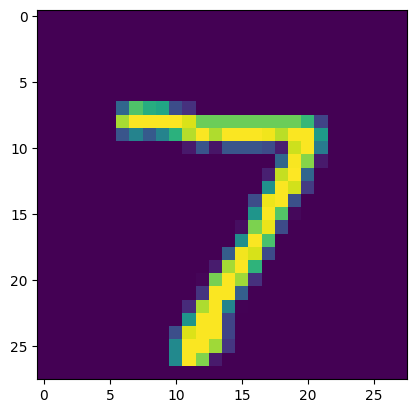

In [66]:
plt.imshow(X_test[0].reshape(28, 28)); # original input image encoded

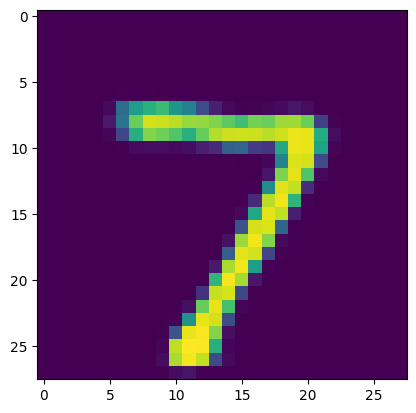

In [67]:
plt.imshow(decoded_image.reshape(28, 28));